# Code for Education project

### Import Libraries

In [179]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")
     


### Load Data

#### Inspect the school data

In [180]:
import requests

url = "https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=1"
r = requests.get(url)
open("ccd_sch_029_1617_w_1a_11212017.csv", "wb").write(r.content)

40477083

In [181]:
school_information = pd.read_csv(
    "ccd_sch_029_1617_w_1a_11212017.csv", encoding="unicode_escape"
)

/var/folders/xt/nxv5zlb16l3d5frh__9xjzy80000gn/T/ipykernel_57666/2591098979.py:1: DtypeWarning:

Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.



In [182]:
school_information.head()

SCHOOL_YEAR  FIPST STATENAME  ST                          SCH_NAME  \
0   2016-2017      1   ALABAMA  AL  Sequoyah Sch - Chalkville Campus   
1   2016-2017      1   ALABAMA  AL                             Camps   
2   2016-2017      1   ALABAMA  AL                           Det Ctr   
3   2016-2017      1   ALABAMA  AL     Wallace Sch - Mt Meigs Campus   
4   2016-2017      1   ALABAMA  AL         McNeel Sch - Vacca Campus   

                 LEA_NAME STATE_AGENCY_NO  UNION ST_LEAID   LEAID  ...  \
0  Alabama Youth Services               1    NaN   AL-210  100002  ...   
1  Alabama Youth Services               1    NaN   AL-210  100002  ...   
2  Alabama Youth Services               1    NaN   AL-210  100002  ...   
3  Alabama Youth Services               1    NaN   AL-210  100002  ...   
4  Alabama Youth Services               1    NaN   AL-210  100002  ...   

  G_10_OFFERED  G_11_OFFERED  G_12_OFFERED G_13_OFFERED G_UG_OFFERED  \
0          Yes           Yes           Yes           No           No   
1          Yes           Yes           Yes           No           No   
2          Yes           Yes           Yes           No           No   
3          Yes           Yes           Yes           No           No   
4          Yes           Yes           Yes           No           No   

  G_AE_OFFERED GSLO GSHI LEVEL    IGOFFERED  
0           No   07   12  High  As reported  
1           No   07   12  High  As reported  
2           No   07   12  High  As reported  
3           No   07   12  High  As reported  
4           No   07   12  High  As reported  

[5 rows x 65 columns]

In [183]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

Note there are no null values. It looks like the ID columns are integer or float types. We will want to convert those to an object or string. 

#### Inspect the ACT data

In [184]:
edgap = pd.read_excel('https://raw.githubusercontent.com/mcsilver99/education/main/data/EdGap_data.xlsx', engine ='openpyxl', dtype={'NCESSCH Schhool ID': object})


/Users/mayasilver/Applications/anaconda3/lib/python3.13/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning:

Unknown extension is not supported and will be removed



In [185]:
edgap.head()

NCESSCH School ID  CT Unemployment Rate  CT Pct Adults with College Degree  \
0       100001600143              0.117962                           0.445283   
1       100008000024              0.063984                           0.662765   
2       100008000225              0.056460                           0.701864   
3       100017000029              0.044739                           0.692062   
4       100018000040              0.077014                           0.640060   

   CT Pct Childre In Married Couple Family  CT Median Household Income  \
0                                 0.346495                     42820.0   
1                                 0.767619                     89320.0   
2                                 0.713090                     84140.0   
3                                 0.641283                     56500.0   
4                                 0.834402                     54015.0   

   School ACT average (or equivalent if SAT score)  \
0                                        20.433455   
1                                        19.498168   
2                                        19.554335   
3                                        17.737485   
4                                        18.245421   

   School Pct Free and Reduced Lunch  
0                           0.066901  
1                           0.112412  
2                           0.096816  
3                           0.296960  
4                           0.262641

In [186]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   int64  
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 436.9 KB


Looks like there are some null values that we might have to impute or remove.

#### Inspect the report card data that shows student to teacher ratio 

In [240]:
reportcard = pd.read_csv("https://raw.githubusercontent.com/mcsilver99/education/main/data/report_card.csv", dtype ={'SchoolOrganizationId':object})

In [241]:
reportcard.head()

RowId SchoolYear  OrganizationLevelId OrganizationLevel  OrganizationId  \
0      1    2017-18                    1             State          103300   
1      2    2017-18                    2               ESD          100004   
2      3    2017-18                    2               ESD          100001   
3      4    2017-18                    2               ESD          100002   
4      5    2017-18                    2               ESD          100003   

                   OrganizationName    County  ESDOrganizationId  \
0                  Washington State       NaN                NaN   
1            Capital Region ESD 113  Multiple           100004.0   
2  Educational Service District 101  Multiple           100001.0   
3  Educational Service District 105  Multiple           100002.0   
4  Educational Service District 112  Multiple           100003.0   

                            ESDName  LEAOrganizationId  LEACode LEAName  \
0                               NaN                NaN      NaN     NaN   
1            Capital Region ESD 113                NaN      NaN     NaN   
2  Educational Service District 101                NaN      NaN     NaN   
3  Educational Service District 105                NaN      NaN     NaN   
4  Educational Service District 112                NaN      NaN     NaN   

  SchoolOrganizationId  SchoolCode SchoolName  TeacherTotal  StudentTotal  \
0                  NaN         NaN        NaN         65241     1130714.0   
1                  NaN         NaN        NaN          4458       75778.0   
2                  NaN         NaN        NaN          5939       94473.0   
3                  NaN         NaN        NaN          3767       66590.0   
4                  NaN         NaN        NaN          6205      103576.0   

   StudentToTeacherRatio  IsEEValidated DataAsOf  
0                   17.3              1  1/10/25  
1                   17.0              1  1/10/25  
2                   15.9              1  1/10/25  
3                   17.7              1  1/10/25  
4                   16.7              1  1/10/25

Now we have data on the student to teacher ratio. We will join on school organization ID with the school data first and then join that data with the edGap data.

#### Compare the data sets

**Summary**: The school data set is a lot larger than the EdGap data. There is data ~22,000 more schools in the school data than the EdGap data. The data is in tidy format. The data types for the variables of interest look correct, but the school identifier is an object in the EdGap data set and a float in the school information data set. 

### Is the data suitable for answering the question? 

#### Create a pair plots

<function matplotlib.pyplot.show(close=None, block=None)>

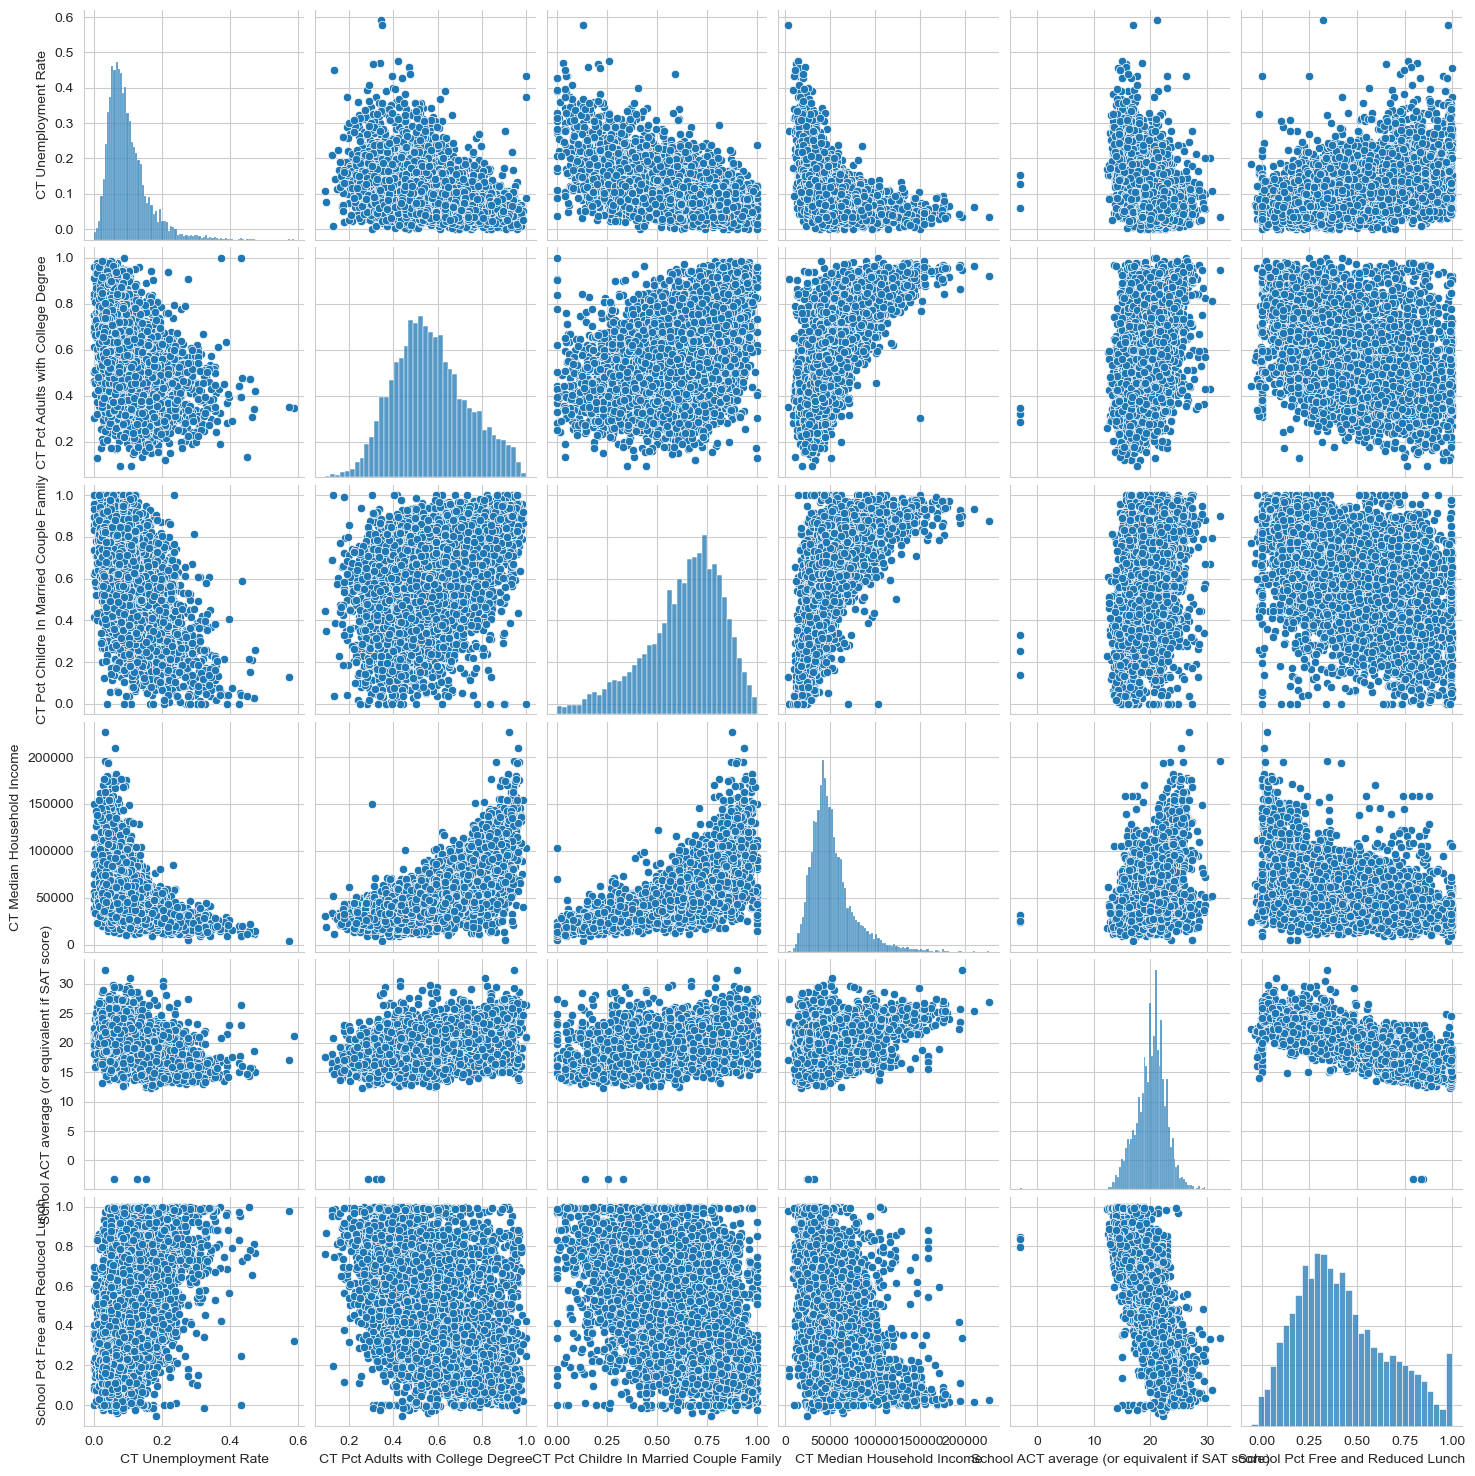

In [187]:
sns.pairplot(edgap.drop(columns = 'NCESSCH School ID'))
plt.show

we can use this view to get an idea of which variables we want to test further and which would not be good candiates.

#### Add regression lines and format the pair plot

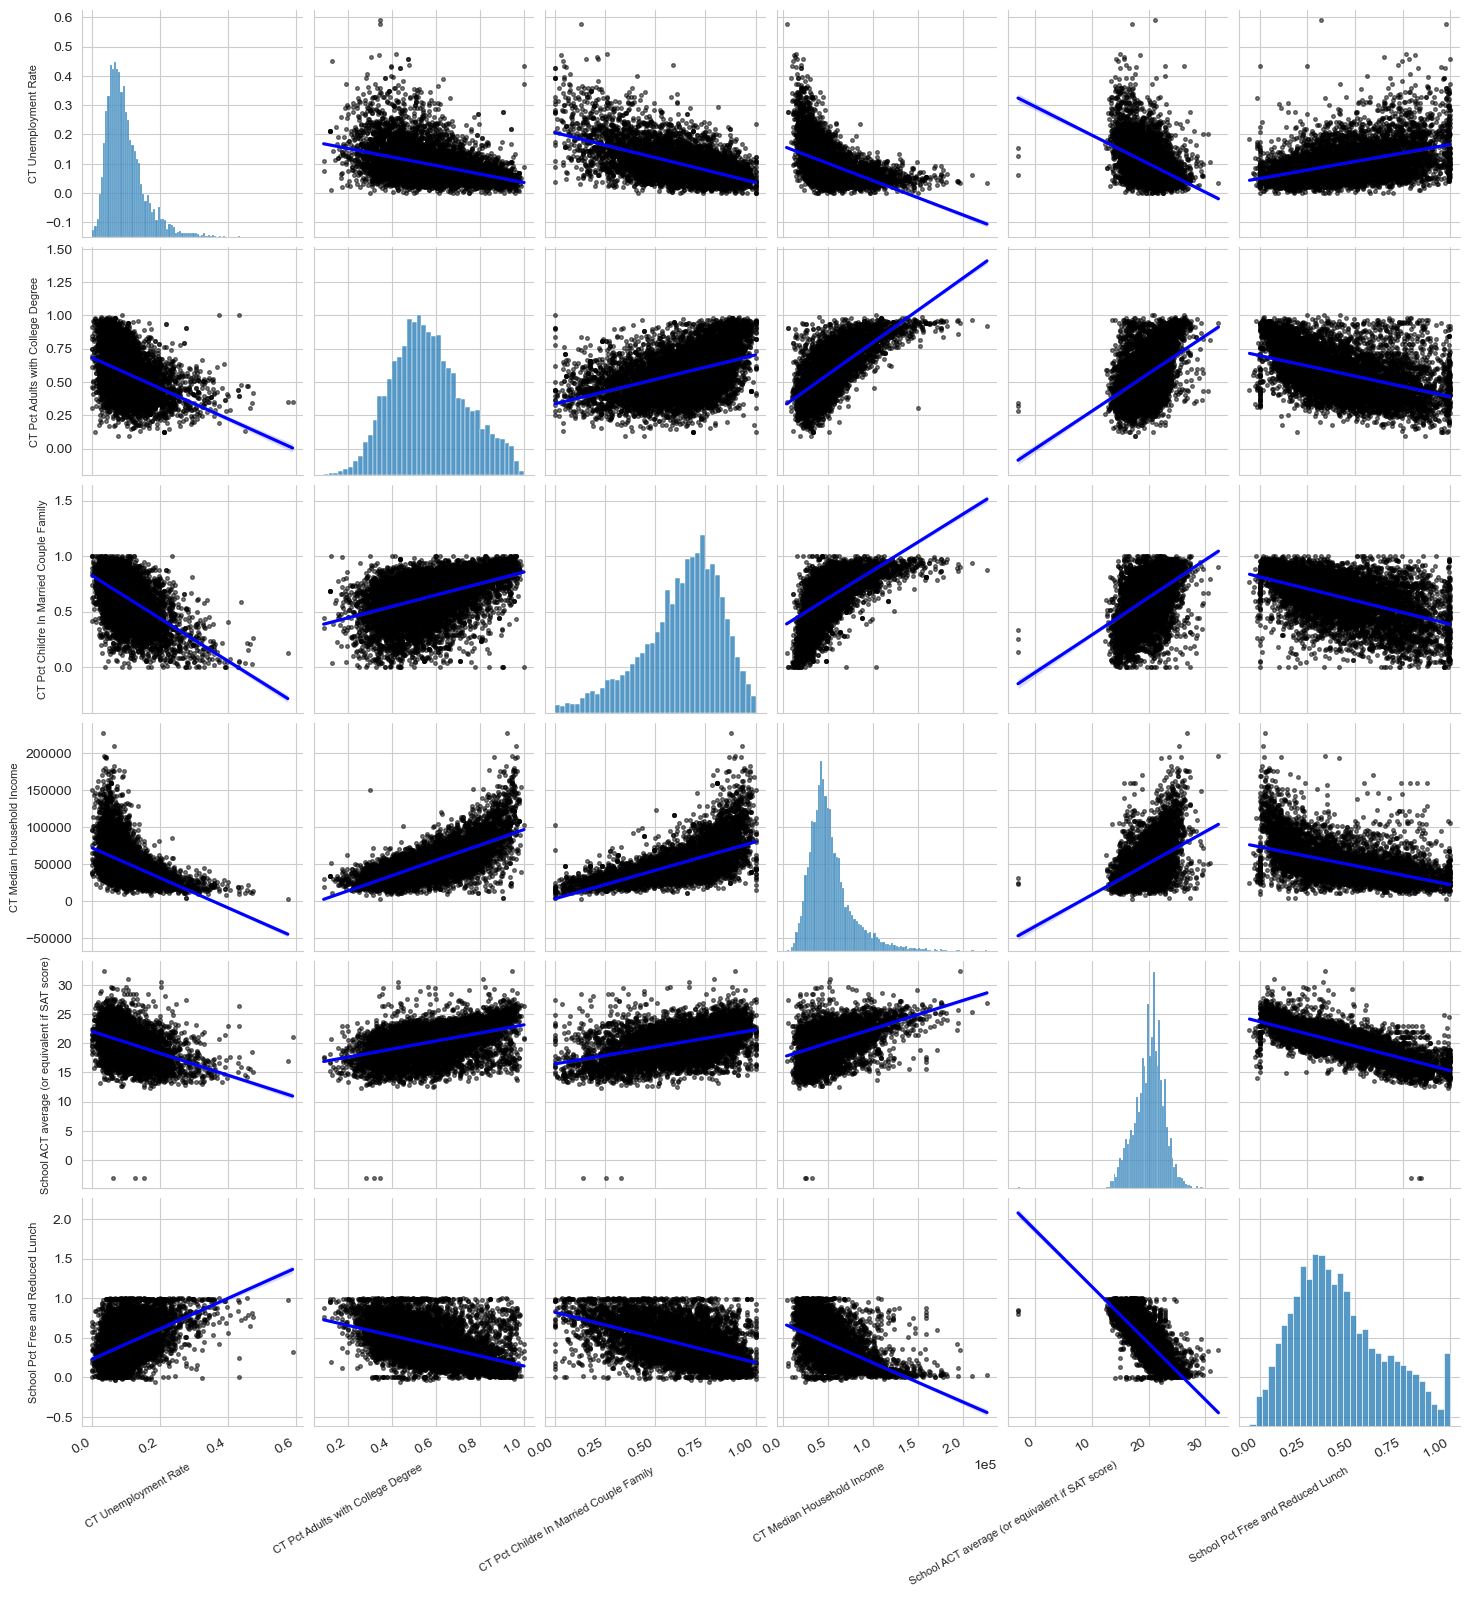

In [188]:
fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    kind="reg",
    plot_kws={
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7}
    }
)

for ax in fig.axes.flat: 
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
        
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # x-axis label
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # y-axis label
    
    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()



#### Plot a single row

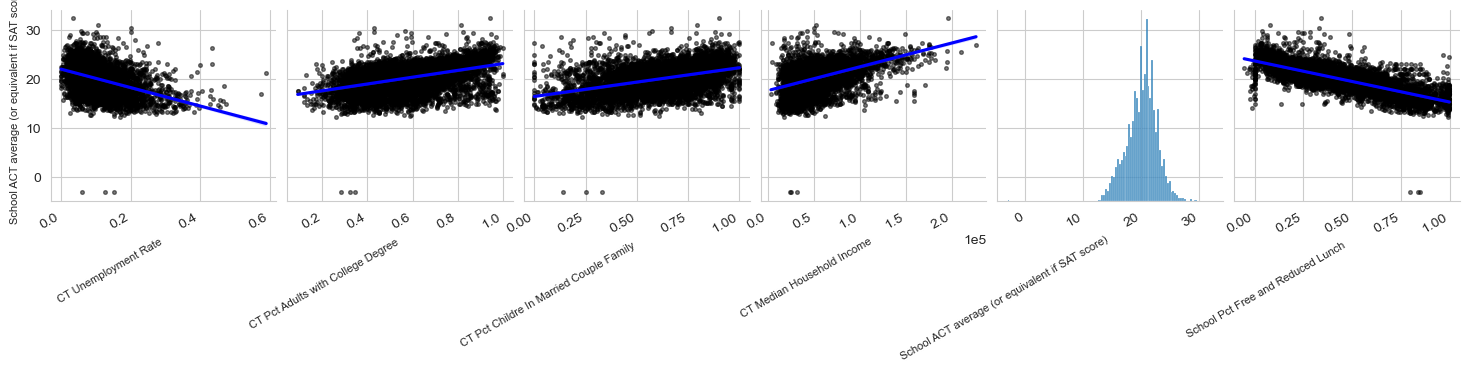

In [189]:
fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    y_vars = ['School ACT average (or equivalent if SAT score)'],
    kind ="reg",
    plot_kws = {
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7}
    }
)

for ax in fig.axes.flat: 
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
        
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # x-axis label
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # y-axis label
    
    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()



**Summary:** There appears to be a relationship between the socioeconomic variables and thhe ACT score. There are some out of range ACT and percent lunch values thaht will to be dealt with. We should have confidence that it is worthwhile to spend time preparing the data for analysis. 

### Data Preparation

#### Select relevant subsets of the data

In [190]:
school_information = school_information[
    ['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']
]

In [191]:
school_information.head()

SCHOOL_YEAR       NCESSCH LSTATE   LZIP       SCH_TYPE_TEXT LEVEL  \
0   2016-2017  1.000020e+10     AL  35220  Alternative School  High   
1   2016-2017  1.000020e+10     AL  36067  Alternative School  High   
2   2016-2017  1.000020e+10     AL  36784  Alternative School  High   
3   2016-2017  1.000020e+10     AL  36057  Alternative School  High   
4   2016-2017  1.000020e+10     AL  35206  Alternative School  High   

  CHARTER_TEXT  
0           No  
1           No  
2           No  
3           No  
4           No

In [192]:
#### Rename columns

In [193]:
edgap = edgap.rename(
    columns={
        "NCESSCH School ID": "id",
        "CT Pct Adults with College Degree": "percent_college",
        "CT Unemployment Rate": "rate_unemployment",
        "CT Pct Childre In Married Couple Family": "percent_married",
        "CT Median Household Income": "median_income",
        "School ACT average (or equivalent if SAT score)": "average_act",
        "School Pct Free and Reduced Lunch": "percent_lunch",
    }
)

In [194]:
school_information = school_information.rename(
    columns={
        "SCHOOL_YEAR": "year",
        "NCESSCH": "id",
        "LSTATE": "state",
        "LZIP": "zip_code",
        "SCH_TYPE_TEXT": "school_type",
        "LEVEL": "school_level",
        "CHARTER_TEXT": "charter"
    }
)

**Summary:** We selected a subset of columns of the school information data set. We renamed the columns for clarity and to follow formatting guidelines. We are ready to join the data frames.

### Join the Data Frames

In [195]:
school_information['id'] = school_information['id'].astype('object')

In [196]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102183 non-null  object
 1   id            102181 non-null  object
 2   state         102183 non-null  object
 3   zip_code      102183 non-null  object
 4   school_type   102181 non-null  object
 5   school_level  102179 non-null  object
 6   charter       102179 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


#### Join the data frames and call thhe result df. Use a left join on ID as the key.

In [197]:
df = edgap.merge(
    school_information,
    how='left',
    on='id'
)

**Summary:** We joined the data sets using the school id as they key. We first cast the id as an object to have the same data type for the key in each data set. We used a left join to kepp all EdGap data.

#### Quality Control

#### Compute descriptive statistics

In [198]:
df.describe()

rate_unemployment  percent_college  percent_married  median_income  \
count        7972.000000      7973.000000      7961.000000    7966.000000   
mean            0.098730         0.568930         0.633440   52026.905222   
std             0.058959         0.165704         0.196764   24228.057079   
min             0.000000         0.091493         0.000000    3589.000000   
25%             0.058655         0.450828         0.523810   36597.250000   
50%             0.085649         0.554979         0.667594   46833.500000   
75%             0.123376         0.676571         0.777135   61369.250000   
max             0.590278         1.000000         1.000000  226181.000000   

       average_act  percent_lunch  
count  7986.000000    7986.000000  
mean     20.181532       0.420651  
std       2.595201       0.239754  
min      -3.070818      -0.054545  
25%      18.600000       0.238501  
50%      20.400000       0.381570  
75%      21.910867       0.575447  
max      32.362637       0.998729

or use min and max

In [199]:
df.select_dtypes(include=['number']).agg(['min', 'max']).round(2)

rate_unemployment  percent_college  percent_married  median_income  \
min               0.00             0.09              0.0         3589.0   
max               0.59             1.00              1.0       226181.0   

     average_act  percent_lunch  
min        -3.07          -0.05  
max        32.36           1.00

#### Set out-of-range values to `NaN` using `np.nan`.

In [200]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan

In [201]:
df.loc[df['average_act'] < 1, 'average_act'] = np.nan

##### Check the types, levels, and charter status of schools

In [202]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [203]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

In [204]:
df['charter'].value_counts()

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64

**Keep only high schools.**

In [205]:
df = df.loc[df['school_level'] == 'High']

**Check for duplicated rows.**

In [206]:
df.duplicated().sum()

np.int64(0)

It is possible that there are incorrectly recorded values in the data set, but we will not go that far in this example.

### Identify missing values

##### How many missing values are there? 

In [207]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               3
percent_lunch                            20
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

##### What percentage of values of each variable are missing?

In [208]:
percent_missing = df.isna().mean().round(4) * 100

percent_missing.to_frame(name='Percent Missing Values')

Percent Missing Values
id                                   0.00
rate_unemployment                    0.17
percent_college                      0.15
percent_married                      0.28
median_income                        0.22
average_act                          0.04
percent_lunch                        0.28
year                                 0.00
state                                0.00
zip_code                             0.00
school_type                          0.00
school_level                         0.00
charter                              0.00

##### What states do we have data from?

In [209]:
df['state'].value_counts()

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

#### Plot the results on a map

In [210]:
import plotly.offline as po
import plotly.graph_objs as pg

In [211]:
layout = dict(
    geo={"scope": "usa"}, coloraxis_colorbar=dict(title="Number of Schools")
)

data = dict(
    type="choropleth",
    locations=df["state"].value_counts().index,
    locationmode="USA-states",
    z=df["state"].value_counts().values,
    coloraxis="coloraxis",
)

x = pg.Figure(data=[data], layout=layout)

po.iplot(x)

#### Drop the rows where the average ACT score is missing

In [212]:
df = df.dropna(subset=['average_act'])

In [213]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               0
percent_lunch                            20
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

##### If we drop rows that have `NaNs` for any socioeconomic variables, then we will negatively affect our analysis using the variables where data were present. So, we will not drop the rows in this data set that are missing the socioeconomic variables. We will impute the missing values.

**Summary:** 
1. We set out-of-range values to `NaN` and will impute them.

2. We kept only high schools.

3.  We removed schools where we do not have the ACT score.

4.  Many schools are missing from the data by omission.

5.  We will impute missing values of socioeconomic variables.

### Impute the NaN values and export the the clean data set

##### Define the predictor variables to be `rate_unemployment`, `percent_college`, `percent_married`, `median_income`, `percent_lunch`, `state`, and `charter`.

In [214]:
predictor_variables = [
    'rate_unemployment',
    'percent_college',
    'percent_married',
    'median_income',
    'percent_lunch',
    'state',
    'charter'
]

##### Use the iterative imputer to replace missing values in the columns corresponding to predictor variables in the analysis.

In [215]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [216]:
imputer = IterativeImputer()

##### Fit the imputer using the numerical predictor 

1.   List item
2.   List item

variables (this can include dummies for categorical variables).

Define the columns you want to use in the imputation process

In [217]:
numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


##### Fit the imputer

In [218]:
imputer.fit(df.loc[:, numerical_predictors])

IterativeImputer()

##### Impute the missing values in the training data.

In [219]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

##### Check for missing values

In [220]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                         0
percent_college                           0
percent_married                           0
median_income                             0
average_act                               0
percent_lunch                             0
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

###### Export the clean data set

In [221]:
df.to_csv(
    'education_clean.csv',
    encoding='utf-8-sig',
    index=False
)

**Summary:**
1. We used an interative imputer to estimate missing values of numerical predictor variables

2. We saved the clean data frame as a csv file.

# Exploratory Data Analysis

**Clean data is already loaded from previous steps.**

#### Inspect the first five rows of the data

In [224]:
df.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch       year state zip_code  \
0        42820.0    20.433455       0.066901  2016-2017    DE    19804   
1        89320.0    19.498168       0.112412  2016-2017    DE    19709   
2        84140.0    19.554335       0.096816  2016-2017    DE    19709   
3        56500.0    17.737485       0.296960  2016-2017    DE    19958   
4        54015.0    18.245421       0.262641  2016-2017    DE    19934   

      school_type school_level charter  
0  Regular School         High     Yes  
1  Regular School         High      No  
2  Regular School         High      No  
3  Regular School         High      No  
4  Regular School         High      No

### Examine distributions and relationships
Plot the correlation matrix of the numerical variables in the training data to explore relationships between the variables.

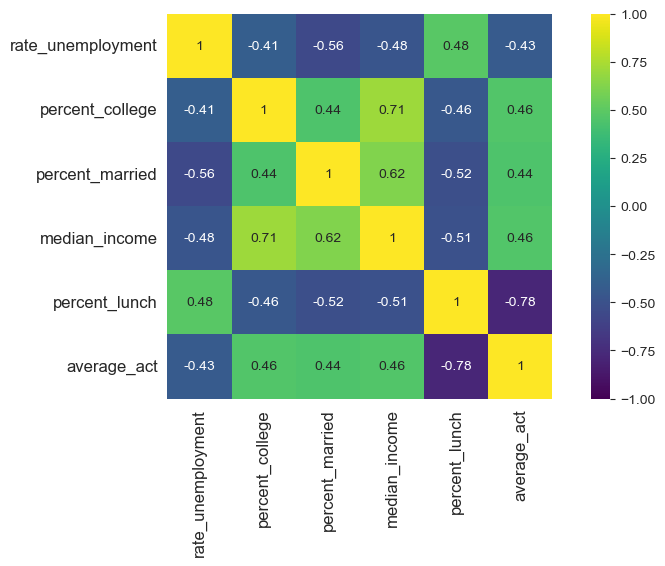

In [234]:
predictor_variables = ["rate_unemployment", "percent_college", "percent_married",
 "median_income", "percent_lunch"]

numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = df[numerical_predictors + ["average_act"]].corr()

plt.figure(figsize=(10,5))

sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

We can see that there is strong correlation between the percentage of students who qualify for a discounted lunch program. Not only are the predictor variables associated with ACT score but also with each other. 

#### Make pair plots to explore relationships between the variables

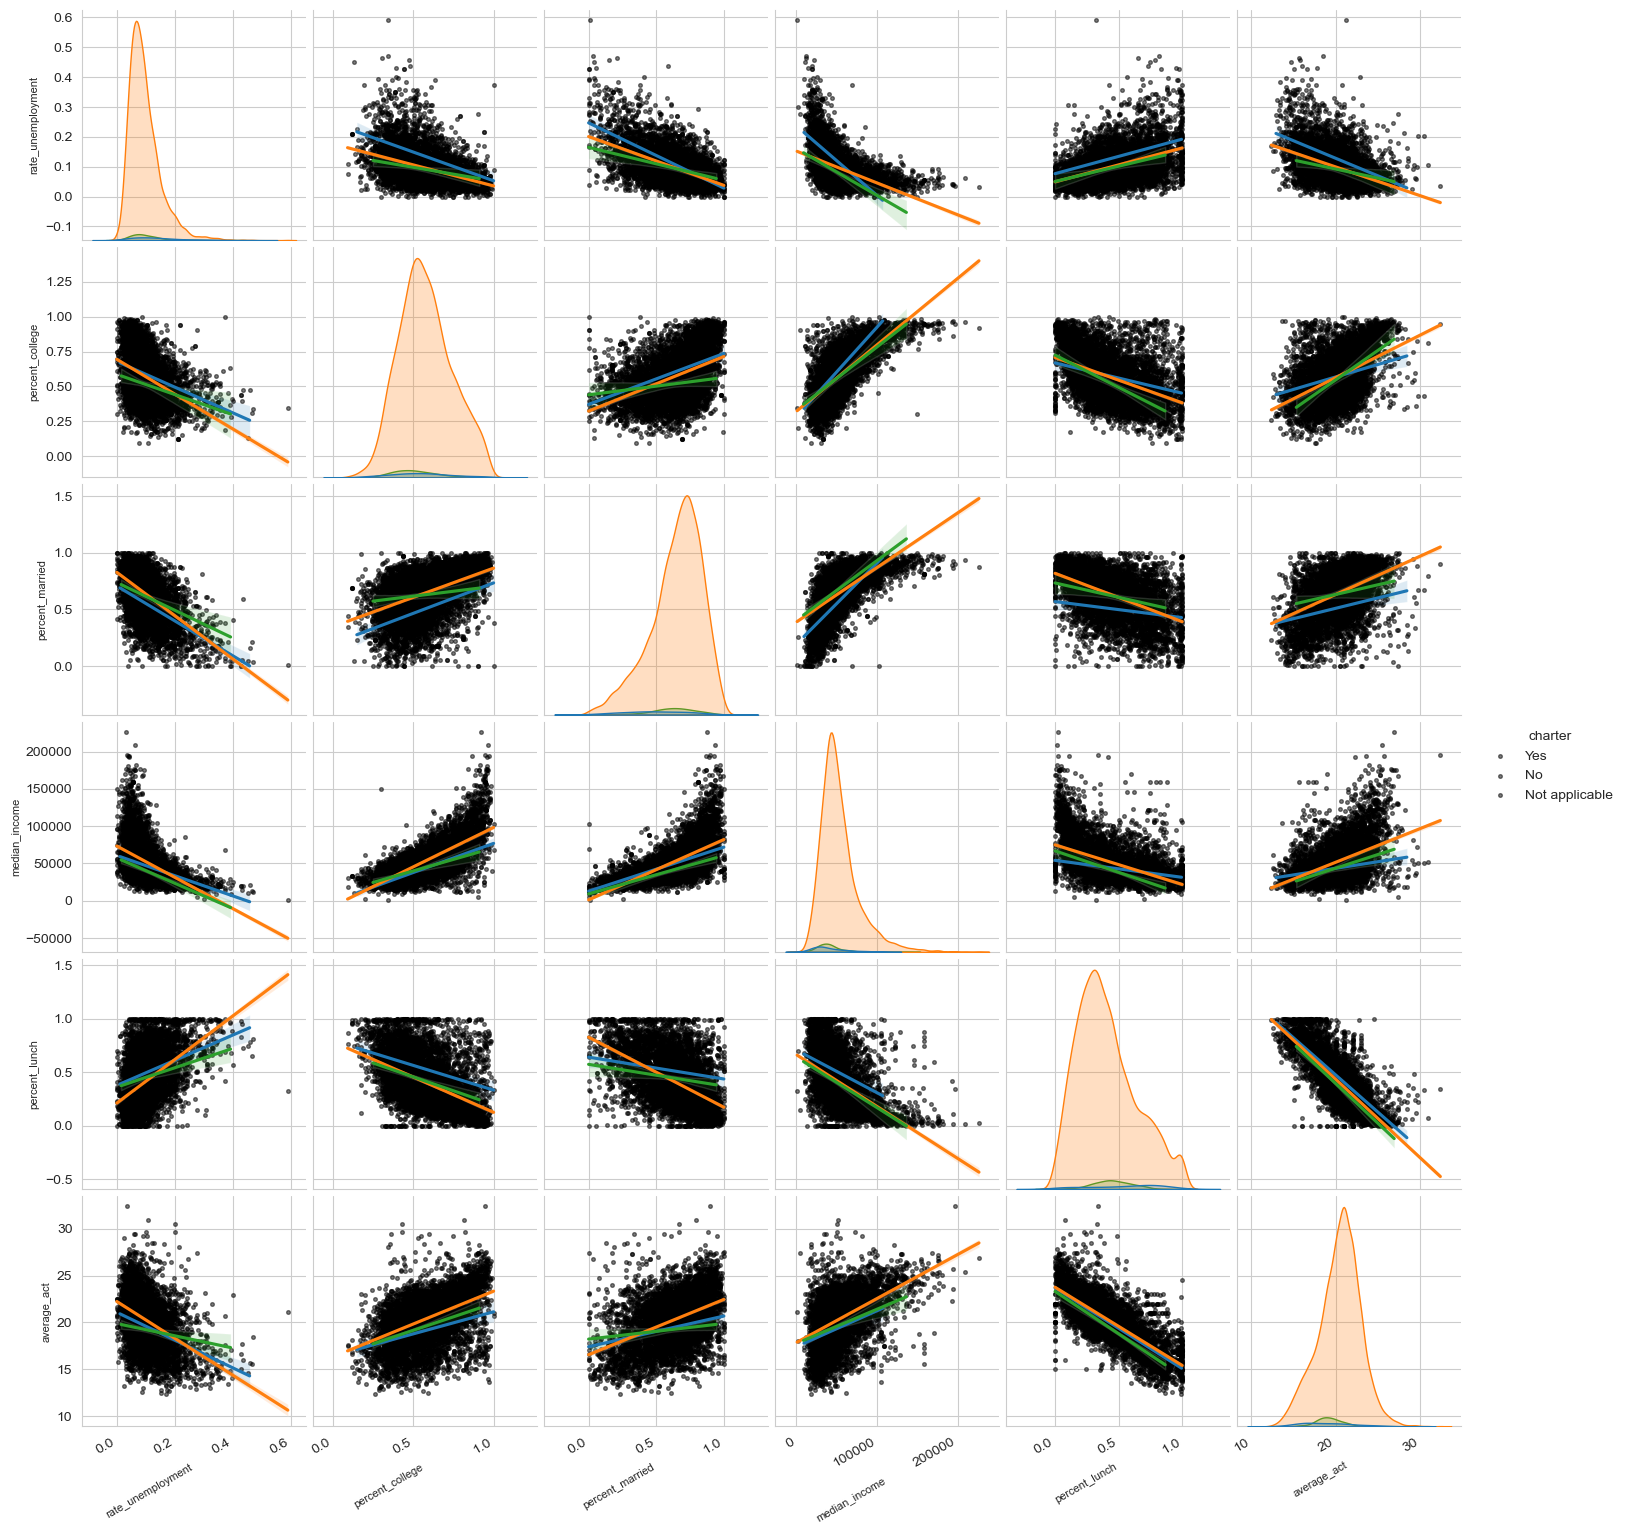

In [235]:
fig = sns.pairplot(
    data = df,
    vars = numerical_predictors + ['average_act'],
    hue = 'charter',
    kind="reg",
    plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7}
    }
)

for ax in fig.axes.flat: 
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
        
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # x-axis label
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # y-axis label
    
    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

There are relationships between thhe other variables, as we have seen reflected in the correlation matrix. We should look at if the relationships are linear or nonlinear. It may also be helpful to see if outliers are skewing the data. 

#### Identify outliers

We can use the interquartile range to identify outliers. This is also evident in boxplots of the data. Median income is on a very different scale than the other predictors, so we wil make two plots to explore the data. 

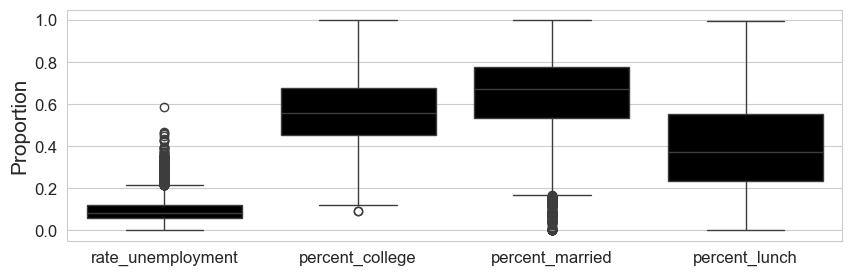

In [236]:
plt.figure(figsize=(10,3))

fractions = list(numerical_predictors)
fractions.remove('median_income')

sns.boxplot(data=df[fractions], color='k')

plt.ylabel('Proportion', fontsize=15)

plt.tick_params(labelsize=12)

plt.show()

The values do have outliers but not so much so that we will want to exclude them. 

#### Look at the box plot of the median income variable 

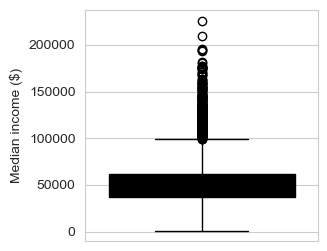

In [239]:
plt.figure(figsize=(3,3))
sns.boxplot(data=df, y='median_income', color='k')
plt.ylabel('Median income ($)')

plt.show()

There are quite a few outliers but that is expected in income data. We should be mindful of the outliers but they do not look incorrect. 

**Summary:**
* The numerical predictors are related to average_act. The relationships appear roughly linear.
* The numerical predictors are correlated with each other, suggesting that not all predictors will be neccessary.
* Some variables have skewed distributions, suggesting transformations of input variables might be useful.
* There are outliers in rate_unemployment, percent_college, percent_married, and median_income. None of these are obviously incorrect values; they likely reflect skewed distributions. We may consider applying something like a log transformation to these predictors as we explore different models.
* The relationships are similar across charter and non-chharter schools, but might be significantly different. 